In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# 파일 불러오기 
df = pd.read_csv('2021_2025_연봉_합본데이터_최종(계약금).csv')
df

,선수,연봉(만원),팀,pid,연도,팀연봉순위,전체연봉순위,계약금(만원),계약금(만원)분할,연봉 총수령액(만원)
0,가빌리오,44980,SSG 랜더스,14896,2021,8,70,0,0,44980
1,강경학,8700,KIA 타이거즈,10676,2021,24,264,0,0,8700
2,강동연,4400,NC 다이노스,10883,2021,44,442,0,0,4400
3,강동호,3500,롯데 자이언츠,12927,2021,45,491,0,0,3500
4,강로한,3700,롯데 자이언츠,11389,2021,43,478,0,0,3700
...,...,...,...,...,...,...,...,...,...,...
4223,김주훈,3000,키움 히어로즈,16129,2025,55,567,0,0,3000
4224,서유신,3000,키움 히어로즈,15483,2025,55,567,0,0,3000
4225,박성빈,3000,키움 히어로즈,15479,2025,55,567,0,0,3000
4226,이우석,1500,키움 히어로즈,11360,2025,78,823,0,0,1500


In [3]:
df = df[df['연봉 총수령액(만원)'].ne(0)].reset_index(drop=True)

In [4]:
# 전체 칼럼 
cols = list(df.columns)

# 순서 변경할 칼럼 
change_cols = ['팀연봉순위', '전체연봉순위']

# change_cols 제외 나머지 + move_cols 순으로 재정렬
new_cols = [col for col in cols if col not in change_cols] + change_cols

# 순서 적용
df = df[new_cols]

In [5]:
df

,선수,연봉(만원),팀,pid,연도,계약금(만원),계약금(만원)분할,연봉 총수령액(만원),팀연봉순위,전체연봉순위
0,가빌리오,44980,SSG 랜더스,14896,2021,0,0,44980,8,70
1,강경학,8700,KIA 타이거즈,10676,2021,0,0,8700,24,264
2,강동연,4400,NC 다이노스,10883,2021,0,0,4400,44,442
3,강동호,3500,롯데 자이언츠,12927,2021,0,0,3500,45,491
4,강로한,3700,롯데 자이언츠,11389,2021,0,0,3700,43,478
...,...,...,...,...,...,...,...,...,...,...
4189,송지후,3000,키움 히어로즈,16130,2025,0,0,3000,55,567
4190,김주훈,3000,키움 히어로즈,16129,2025,0,0,3000,55,567
4191,서유신,3000,키움 히어로즈,15483,2025,0,0,3000,55,567
4192,박성빈,3000,키움 히어로즈,15479,2025,0,0,3000,55,567


In [6]:
df['연봉 총수령액(만원)'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4194 entries, 0 to 4193
Series name: 연봉 총수령액(만원)
Non-Null Count  Dtype
--------------  -----
4194 non-null   int64
dtypes: int64(1)
memory usage: 32.9 KB


### 연봉 등급 4구간

In [8]:
bins = [0, 5000, 10000, 50000, float('inf')]
labels = ['D', 'C', 'B', 'A']

df['연봉등급'] = pd.cut(df['연봉 총수령액(만원)'], bins=bins, labels=labels, right=False)

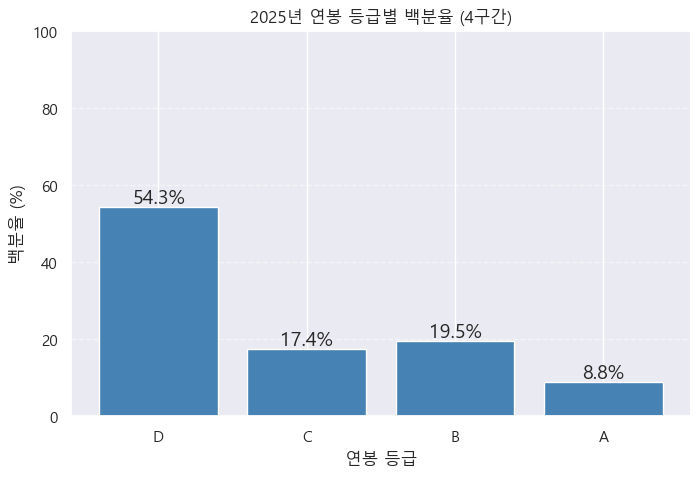

In [9]:
grade_pct = df['연봉등급'].value_counts(normalize=True).reindex(labels, fill_value=0) * 100

plt.figure(figsize=(8, 5))
plt.bar(grade_pct.index, grade_pct.values, color='steelblue')
plt.ylabel('백분율 (%)')
plt.xlabel('연봉 등급')
plt.title('2025년 연봉 등급별 백분율 (4구간)')
plt.ylim(0, 100)

for i, v in enumerate(grade_pct.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')
    
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [10]:
# 4. 확인
df= df[['팀', '선수', '연봉 총수령액(만원)', '연봉등급', 'pid', '연도', '팀연봉순위', '전체연봉순위']]
df

,팀,선수,연봉 총수령액(만원),연봉등급,pid,연도,팀연봉순위,전체연봉순위
0,SSG 랜더스,가빌리오,44980,B,14896,2021,8,70
1,KIA 타이거즈,강경학,8700,C,10676,2021,24,264
2,NC 다이노스,강동연,4400,D,10883,2021,44,442
3,롯데 자이언츠,강동호,3500,D,12927,2021,45,491
4,롯데 자이언츠,강로한,3700,D,11389,2021,43,478
...,...,...,...,...,...,...,...,...
4189,키움 히어로즈,송지후,3000,D,16130,2025,55,567
4190,키움 히어로즈,김주훈,3000,D,16129,2025,55,567
4191,키움 히어로즈,서유신,3000,D,15483,2025,55,567
4192,키움 히어로즈,박성빈,3000,D,15479,2025,55,567


In [11]:
df['팀연봉순위'] = (
    df.groupby(['팀', '연도'])['연봉 총수령액(만원)']
      .rank(method='min', ascending=False)
      .astype(int)
)

# 투수 기준 연도별 전체 연봉 순위
df['전체연봉순위'] = (
    df.groupby('연도')['연봉 총수령액(만원)']
      .rank(method='min', ascending=False)
      .astype(int)
)

In [12]:
df = df.sort_values(
    ['연도', '팀', '팀연봉순위', '연봉 총수령액(만원)'],
    ascending=[True, True, True, False]
).reset_index(drop=True)

df

,팀,선수,연봉 총수령액(만원),연봉등급,pid,연도,팀연봉순위,전체연봉순위
0,KIA 타이거즈,브룩스,156000,A,14610,2021,1,5
1,KIA 타이거즈,터커,136500,A,14224,2021,2,9
2,KIA 타이거즈,최형우,133333,A,10344,2021,3,10
3,KIA 타이거즈,멩덴,94250,A,14755,2021,4,29
4,KIA 타이거즈,김선빈,45000,B,10008,2021,5,68
...,...,...,...,...,...,...,...,...
4189,한화 이글스,이기창,3000,D,16111,2025,62,567
4190,한화 이글스,정안석,3000,D,16109,2025,62,567
4191,한화 이글스,한서구,3000,D,15426,2025,62,567
4192,한화 이글스,성지훈,3000,D,15631,2025,62,567


In [34]:
df.rename(columns={'연봉등급': '연봉등급(만원)'}, inplace=True)
df

,팀,선수,연봉 총수령액(만원),연봉등급(만원),pid,연도,팀연봉순위,전체연봉순위
0,KIA 타이거즈,브룩스,156000,A,14610,2021,1,5
1,KIA 타이거즈,터커,136500,A,14224,2021,2,9
2,KIA 타이거즈,최형우,133333,A,10344,2021,3,10
3,KIA 타이거즈,멩덴,94250,A,14755,2021,4,29
4,KIA 타이거즈,김선빈,45000,B,10008,2021,5,68
...,...,...,...,...,...,...,...,...
4189,한화 이글스,이기창,3000,D,16111,2025,62,567
4190,한화 이글스,정안석,3000,D,16109,2025,62,567
4191,한화 이글스,한서구,3000,D,15426,2025,62,567
4192,한화 이글스,성지훈,3000,D,15631,2025,62,567


In [36]:
# 연도별로 연봉 내림차순 정렬(동순위 타이브레이커: pid, 선수)
sort_cols = ['연도', '연봉 총수령액(만원)']
if 'pid' in df.columns: 
    sort_cols += ['pid']
elif '선수' in df.columns:
    sort_cols += ['선수']

df = df.sort_values(sort_cols, ascending=[True, False] + [True]*(len(sort_cols)-2)).copy()

# 연도별 1,2,3... 순번 만들기 (정확한 인원 컷용)
pos_in_year = df.groupby('연도').cumcount() + 1

# 등급 부여
conditions = [
    pos_in_year <= 30,
    pos_in_year <= 60,
    pos_in_year <= 300
]
choices = ['A', 'B', 'C']

df['연봉등급(순위)'] = np.select(conditions, choices, default='D')
df['연봉등급(순위)'] = pd.Categorical(df['연봉등급(순위)'], categories=['A','B','C','D'], ordered=True)

In [38]:
df

,팀,선수,연봉 총수령액(만원),연봉등급(만원),pid,연도,팀연봉순위,전체연봉순위,연봉등급(순위)
340,SSG 랜더스,추신수,270000,A,14888,2021,1,1,A
255,NC 다이노스,루친스키,208000,A,13932,2021,1,2,A
256,NC 다이노스,알테어,169000,A,14599,2021,2,3,A
422,두산 베어스,허경민,162500,A,10184,2021,1,4,A
0,KIA 타이거즈,브룩스,156000,A,14610,2021,1,5,A
...,...,...,...,...,...,...,...,...,...
3937,롯데 자이언츠,박찬형,3000,D,16395,2025,59,567,D
3838,두산 베어스,이한별,3000,D,16399,2025,55,567,D
3757,SSG 랜더스,장현진,3000,D,16400,2025,51,567,D
3622,LG 트윈스,코엔 윈,1600,D,15265,2025,80,822,D


In [46]:
# '연봉등급(순위)' 컬럼을 썼다면
df_21A = df[(df['연도'] == 2021) & (df['연봉등급(순위)'].eq('A'))].copy()
#df_21A

In [44]:
# '연봉등급(순위)' 컬럼을 썼다면
df_22A = df[(df['연도'] == 2022) & (df['연봉등급(순위)'].eq('A'))].copy()
#df_22A

In [50]:
# 저장 
df.to_csv('2021_2025_선수연봉_등급(순위).csv', index=False, encoding='utf-8-sig')